In [1]:
%matplotlib inline
import matplotlib
#matplotlib.use("AGG")
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
from pylab import *
import numpy.ma as ma
from glob import glob
from scipy.io import netcdf
import numpy.ma as ma
import string
from scipy import stats
import matplotlib as mpl
import scipy.ndimage as ndimage
from netCDF4 import Dataset

In [84]:
#help(np.array)

In [85]:
snow_map=np.array([
                [10,15,20,10,10,15,20,20,20,20,15,15,20,15,10,15,10,15,20],
                [15,10,10,15,10,10,10,15,10,10,0,20,15,15,10,5,10,10,20],
                [10,15,20,10,10,5,20,20,20,0,15,15,0,15,10,15,20,15,10],
                [15,20,15,10,15,10,10,10,15,20,10,10,20,15,15,20,15,10,15],
                [15,10,15,10,10,10,15,20,10,10,10,15,15,20,15,10,10,10,10],
                [10,15,20,10,10,15,20,20,20,20,15,15,20,15,10,20,10,10,10],
                [30,25,40,30,10,15,20,10,10,15,20,20,20,20,15,15,20,15,10],
                [10,15,20,10,10,15,20,20,20,20,15,15,20,15,10,15,20,15,20],
                [15,10,10,15,20,10,10,15,20,20,20,20,15,15,20,15,10,20,20],
                [10,15,20,10,10,15,20,20,20,20,15,15,20,15,10,15,20,15,10],
                [15,20,15,10,15,20,10,10,15,20,20,20,20,15,15,20,15,10,10],
                [15,10,15,20,10,10,15,20,20,20,20,15,15,20,15,10,10,20,20],
                [10,15,20,10,10,15,20,20,20,20,15,15,20,15,10,20,10,10,10],
                [10,15,20,10,10,15,20,10,10,15,20,20,20,20,15,15,20,15,10],
                [10,10,15,20,10,10,15,20,20,20,20,15,15,20,15,10,5,10,10],
                [10,15,20,10,10,15,20,20,20,20,15,15,20,15,10,5,10,10,10]])

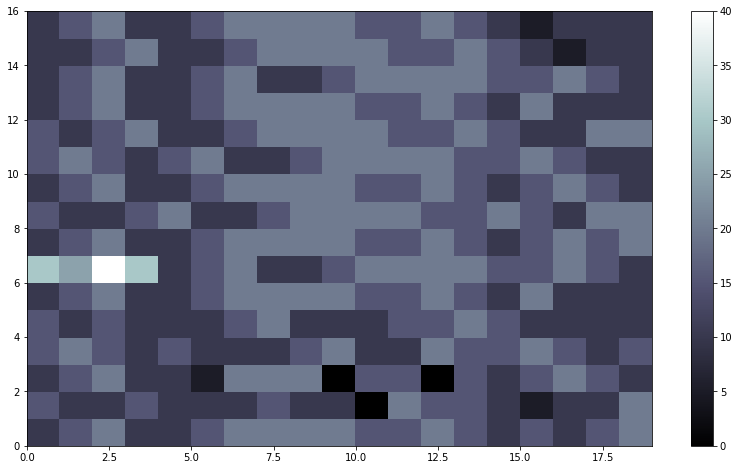

In [126]:
#snow_map=np.array([[10,15,20,10,10,15,20], [10,15,20,10,10,15,20]])
plt.figure(figsize=(14,8))
pcolor(snow_map,cmap='bone')
colorbar()

In [106]:
ice_map=np.array([
                [1.0,1.5,2.0,1.0,1.0,1.5,2.0,2.0,2.0,2.0,1.5,1.5,2.0,1.5,1.0,1.5,1.0,1.5,2.0],
                [1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.5,1.0,1.0,0.,2.0,1.5,1.5,1.0,0.5,1.0,1.0,2.0],
                [1.0,1.5,2.0,1.0,1.0,0.5,2.0,2.0,2.0,0.,1.5,1.5,0.,1.5,1.0,1.5,2.0,1.5,1.0],
                [1.5,2.0,1.5,1.0,1.5,1.0,1.0,1.0,1.5,2.0,1.0,1.0,2.0,1.5,1.5,2.0,1.5,1.0,1.0],
                [1.5,1.0,1.5,1.0,1.0,1.0,1.5,2.0,1.0,1.0,1.0,1.5,1.5,2.0,1.5,1.0,1.0,1.0,1.0],
                [1.0,1.5,2.0,1.0,1.0,1.5,2.0,2.0,2.0,1.0,1.5,1.5,2.0,1.5,1.0,2.0,1.0,1.0,1.0],
                [4.0,4.5,4.0,5.0,3.0,3.5,3.0,3.0,2.0,2.5,2.0,3.0,3.0,2.0,1.5,1.5,1.0,1.5,1.0],
                [2.0,2.5,3.0,2.0,3.0,2.5,2.0,2.0,2.0,2.0,1.5,1.5,2.0,2.5,2.0,1.5,2.0,1.5,2.0],
                [1.5,2.0,2.0,2.5,2.0,3.0,2.0,2.5,3.0,3.0,2.0,3.0,3.5,2.5,2.0,1.5,2.0,3.0,2.0],
                [1.0,1.5,2.0,3.0,3.0,2.5,2.0,2.0,2.0,2.0,1.5,2.5,2.0,1.5,2.5,1.5,2.0,1.5,3.0],
                [1.5,2.0,1.5,1.0,1.5,2.0,3.0,2.0,2.5,3.0,3.0,2.0,2.0,2.5,1.5,2.0,1.5,2.0,2.0],
                [1.5,2.0,2.5,2.0,3.0,2.0,2.5,2.0,2.0,3.0,3.0,2.5,2.5,2.0,2.5,2.0,3.0,2.0,2.0],
                [2.0,2.5,2.0,1.0,3.0,2.5,2.0,2.0,2.0,2.0,1.5,2.5,2.0,1.5,1.0,2.0,3.0,3.0,2.5],
                [3.0,1.5,3.0,3.0,2.0,1.5,2.0,3.0,2.0,2.5,2.0,2.0,2.0,3.0,2.5,1.5,2.0,2.5,2.0],
                [3.0,3.0,2.5,2.0,1.0,2.0,1.5,3.0,2.0,2.0,2.0,3.5,2.5,2.0,1.5,1.0,3.5,3.0,2.0],
                [1.0,1.5,2.0,1.0,1.0,1.5,2.0,2.0,2.0,2.0,1.5,1.5,2.0,1.5,1.0,.5,1.0,1.0,1.0]])

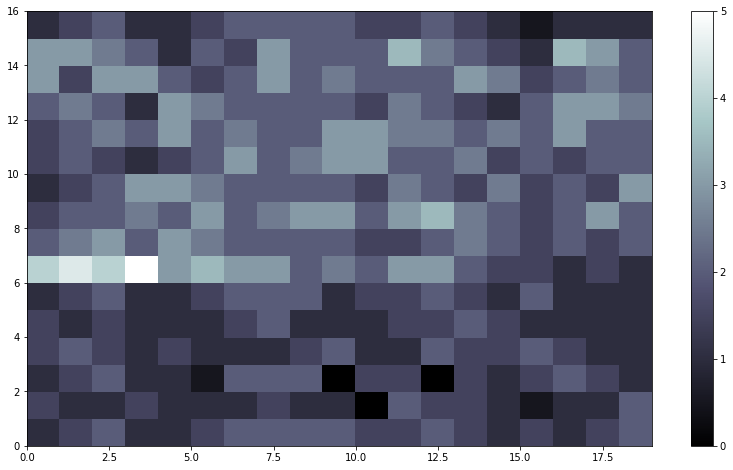

In [127]:
#snow_map=np.array([[10,15,20,10,10,15,20], [10,15,20,10,10,15,20]])
plt.figure(figsize=(14,8))
pcolor(ice_map,cmap='bone')
colorbar()

In [130]:
ice_map[0]

array([1. , 1.5, 2. , 1. , 1. , 1.5, 2. , 2. , 2. , 2. , 1.5, 1.5, 2. ,
       1.5, 1. , 1.5, 1. , 1.5, 2. ])

2.2330827067669174

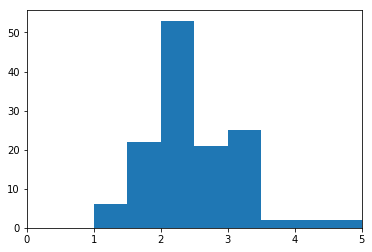

In [152]:
plt.hist(np.hstack(ice_map[6:13]),bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.xlim((0., 5.))
np.mean(np.hstack(ice_map[6:13]))

1.3508771929824561

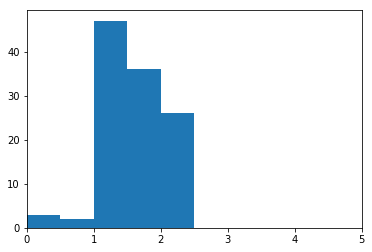

In [151]:
plt.hist(np.hstack(ice_map[0:6]),bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.xlim((0., 5.))
np.mean(np.hstack(ice_map[0:6]))